# Chapter 14 Regression

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import (
    model_selection,
    preprocessing,
)
import warnings
warnings.filterwarnings('ignore')

In [14]:
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Split data

In [2]:
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

## Baseline model

In [3]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

## Linear Regression

In [4]:
from sklearn.linear_model import (
    LinearRegression,
)
lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train) # no scale
lr.score(bos_X_test, bos_y_test)
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [7]:
lr.score(bos_X_test, bos_y_test)

0.711226005748496

In [5]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train) # with scale
lr2.score(bos_sX_test, bos_sy_test)
lr2.intercept_
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

In [6]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484925

In [11]:
from sklearn import datasets
from sklearn.linear_model import (
    LinearRegression,
)
iris = datasets.load_iris()
iX = iris.data
iy = iris.target
lr2 = LinearRegression()
lr2.fit(iX, iy)
list(zip(iris.feature_names, lr2.coef_))

[('sepal length (cm)', -0.11190585392686339),
 ('sepal width (cm)', -0.04007948649493433),
 ('petal length (cm)', 0.22864502724212335),
 ('petal width (cm)', 0.6092520541197897)]

## SVM 

In [15]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(bos_sX_train, bos_sy_train)
svr.score(bos_sX_test, bos_sy_test)

0.6553772022206867

## KNN

In [16]:
from sklearn.neighbors import (
    KNeighborsRegressor,
)
knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592417

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)
dtr.score(bos_X_test, bos_y_test)

0.8559207694719114

In [18]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(
    dtr,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)

In [22]:
dot_data = StringIO()
export_graphviz(
    dtr,
    max_depth=2,
    out_file=dot_data,
    feature_names=bos_X.columns,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)


In [24]:
for col, val in sorted(
    zip(
        bos_X.columns, dtr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(col, val)

RM 0.5759662096813691
LSTAT 0.19235056940742917
DIS 0.11102325362211349
CRIM 0.035446767008261805
NOX 0.029491747620811016


## Random Forest

In [25]:
from sklearn.ensemble import (
    RandomForestRegressor,
)
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)
rfr.score(bos_X_test, bos_y_test)

0.8721182042634867

In [30]:
for col, val in sorted(
    zip(
        bos_X.columns, rfr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(col, val)

RM 0.4393868028101711
LSTAT 0.38003127500229467
DIS 0.06662030830407328
CRIM 0.03168304332996939
PTRATIO 0.02002277078909313


## xgboost

In [32]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(bos_X_train, bos_y_train)
xgr.score(bos_X_test, bos_y_test)
xgr.predict(bos_X.iloc[[0]])

[11:44:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([27.013563], dtype=float32)

In [33]:
xgr.score(bos_X_test, bos_y_test)

0.871679473122472

In [34]:
for col, val in sorted(
    zip(
        bos_X.columns, xgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(col, val)

LSTAT 0.48506042
RM 0.26345253
PTRATIO 0.060353056
NOX 0.05083415
DIS 0.03196777


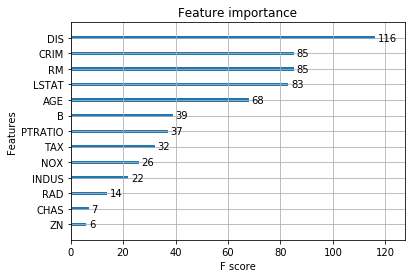

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax)
#fig.savefig("images/mlpr_1405.png", dpi=300)

In [38]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[LSTAT<7.86499977] yes=1,no=2,missing=1
	1:[RM<7.43700027] yes=3,no=4,missing=3
		3:[RM<6.65649986] yes=7,no=8,missing=7
			7:leaf=2.42512202
			8:leaf=3.10899997
		4:[CRIM<2.74223518] yes=9,no=10,missing=9
			9:leaf=4.31652212
			10:leaf=1.07000005
	2:[LSTAT<16.0849991] yes=5,no=6,missing=5
		5:[B<47.7250023] yes=11,no=12,missing=11
			11:leaf=0.86499995
			12:leaf=2.11871624
		6:[DIS<1.94000006] yes=13,no=14,missing=13
			13:leaf=1.06833339
			14:leaf=1.57500005



In [40]:
# fig, ax = plt.subplots(figsize = (6, 4))
# xgb.plot_tree(xgr, ax=ax, num_trees=0)

## Light GBM regression

In [42]:
import lightgbm as lgb
lgr = lgb.LGBMRegressor(random_state=42)
lgr.fit(bos_X_train, bos_y_train)
lgr.predict(bos_X.iloc[[0]])

array([30.31689569])

In [43]:
lgr.score(bos_X_test, bos_y_test)

0.847729219534575

In [46]:
for col, val in sorted(
    zip(
        bos_X.columns, lgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(col, val)

LSTAT 226
RM 199
DIS 172
AGE 130
B 121


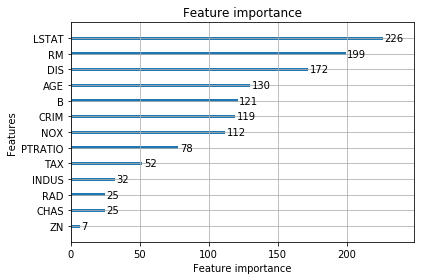

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgr, ax=ax)
fig.tight_layout()
#fig.savefig("images/mlpr_1408.png", dpi=300)